# Show the data

In [1]:
import scipy.io
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('test_data/participant1/A/Shimmer_5470.csv')
df

,Timestamp_5470,Status_5470,CH1_5470,CH2_5470,Event_5470
0,1.635975e+12,128.0,0.150133,2.941000,0.0
1,1.635975e+12,128.0,0.128256,2.938235,-1.0
2,1.635975e+12,128.0,0.094119,2.935110,-1.0
3,1.635975e+12,128.0,0.090873,2.929701,-1.0
4,1.635975e+12,128.0,0.092436,2.948813,-1.0
...,...,...,...,...,...
1540840,1.635976e+12,128.0,-2.207162,-1.237487,-1.0
1540841,1.635976e+12,128.0,-2.212331,-1.240372,-1.0
1540842,1.635976e+12,128.0,-2.212571,-1.244339,-1.0
1540843,1.635976e+12,128.0,-2.218101,-1.248906,-1.0


In [3]:
list(df['Timestamp_5470'][0:2])

[1635974621582.2644, 1635974621583.241]

In [4]:
(df['Timestamp_5470'].iat[-1] - df['Timestamp_5470'].iat[0]) / 1000

1504.8378994140626

In [5]:
df['Time_s'] = df.index * (1/1024)
df

,Timestamp_5470,Status_5470,CH1_5470,CH2_5470,Event_5470,Time_s
0,1.635975e+12,128.0,0.150133,2.941000,0.0,0.000000
1,1.635975e+12,128.0,0.128256,2.938235,-1.0,0.000977
2,1.635975e+12,128.0,0.094119,2.935110,-1.0,0.001953
3,1.635975e+12,128.0,0.090873,2.929701,-1.0,0.002930
4,1.635975e+12,128.0,0.092436,2.948813,-1.0,0.003906
...,...,...,...,...,...,...
1540840,1.635976e+12,128.0,-2.207162,-1.237487,-1.0,1504.726562
1540841,1.635976e+12,128.0,-2.212331,-1.240372,-1.0,1504.727539
1540842,1.635976e+12,128.0,-2.212571,-1.244339,-1.0,1504.728516
1540843,1.635976e+12,128.0,-2.218101,-1.248906,-1.0,1504.729492


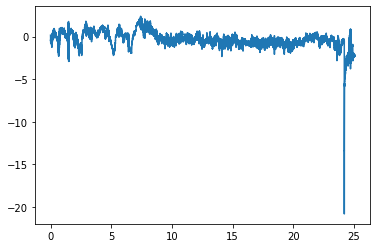

In [6]:
plt.plot(df['Time_s'] * (1/60), df['CH1_5470'])
plt.show()

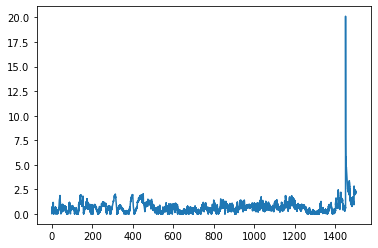

In [7]:
import iron_handmaidens.data.src.preprocess as preprocess
df = pd.read_csv('test_data/participant1/A/Shimmer_5470.csv')
preprocessor = preprocess.Preprocess(df)
preprocessor.df['Time'] = preprocessor.df.index * preprocessor.frequency
df = preprocessor.movingAverage('CH1_5470')
df['Moving Average'] = abs(df['Moving Average'])
plt.plot(df['Time'], df['Moving Average'])
plt.show()

In [8]:
df4680 = pd.read_csv('test_data/participant1/A/Shimmer_4680.csv')
df5470 = pd.read_csv('test_data/participant1/A/Shimmer_5470.csv')

In [9]:
df4680['Timestamp_4680'] = df4680['Timestamp_4680'].astype(int)
df5470['Timestamp_5470'] = df5470['Timestamp_5470'].astype(int)
df4680 = df4680.drop_duplicates('Timestamp_4680')
df5470 = df5470.drop_duplicates('Timestamp_5470')
dfMerge = pd.merge(df4680, df5470, 'inner', left_on='Timestamp_4680', right_on='Timestamp_5470')

In [10]:
left, right = preprocess.Preprocess(df4680), preprocess.Preprocess(df5470)
(left + right).df

,Status_4680,CH1_4680,CH2_4680,Event_4680,Status_5470,CH1_5470,CH2_5470,Event_5470,Timestamp
0,128.0,1.561313,1.403246,0.0,128.0,0.040749,3.071300,-1.0,1635974621639
1,128.0,1.595931,1.397597,-1.0,128.0,0.078492,3.081637,-1.0,1635974621640
2,128.0,1.622737,1.390986,-1.0,128.0,0.095080,3.113371,-1.0,1635974621641
3,128.0,1.627665,1.397837,-1.0,128.0,0.108783,3.110726,-1.0,1635974621642
4,128.0,1.640166,1.417310,-1.0,128.0,0.097605,3.077550,-1.0,1635974621643
...,...,...,...,...,...,...,...,...,...
1504593,128.0,3.534681,-0.214802,-1.0,128.0,-2.205239,-1.249988,-1.0,1635976126363
1504594,128.0,3.536123,-0.217327,-1.0,128.0,-2.205119,-1.250709,-1.0,1635976126364
1504595,128.0,3.538768,-0.217567,-1.0,128.0,-2.204277,-1.250469,-1.0,1635976126365
1504596,128.0,3.535643,-0.216124,-1.0,128.0,-2.208484,-1.252632,-1.0,1635976126366


In [20]:
len(left.df)

1504729

In [12]:
import plotly.offline
import plotly.express as px

In [13]:
fig = px.line(dfMerge[:20], x='Timestamp_4680', y=['CH1_4680', 'CH2_4680'])
fig.show()